In [1]:
import pandas as pd
import numpy as np
import spacy

C:\Users\Win10\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Win10\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Win10\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Win10\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
df=pd.read_csv('D:/Minor Project/0.csv',encoding = 'latin1',header = None)
df.head()

,0,1,2,3,4,5,6,7
0,NaN,hotel_url,author,date,rating,title,text,property_dict
1,0.0,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,violettaf340,2019-01-01T00:00:00,5.0,Xmas holiday,We went here with our kids for Xmas holiday an...,{}
2,1.0,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,Lagaiuzza,2016-01-01T00:00:00,5.0,"Baltic, what else?",We have spent in this hotel our summer holiday...,{}
3,2.0,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,ashleyn763,2014-10-01T00:00:00,5.0,Excellent in every way!,I visited Hotel Baltic with my husband for som...,"{'service': 5.0, 'location': 5.0, 'value': 5.0}"
4,3.0,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,DavideMauro,2014-08-01T00:00:00,5.0,The house of your family's holiday,I've travelled quite a numbers of hotels but t...,"{'service': 5.0, 'cleanliness': 5.0, 'sleep qu..."


In [4]:
df=df[[4,6]]
df.head()

,4,6
0,rating,text
1,5.0,We went here with our kids for Xmas holiday an...
2,5.0,We have spent in this hotel our summer holiday...
3,5.0,I visited Hotel Baltic with my husband for som...
4,5.0,I've travelled quite a numbers of hotels but t...


In [5]:
df.columns=['rating','review']
df.head()

,rating,review
0,rating,text
1,5.0,We went here with our kids for Xmas holiday an...
2,5.0,We have spent in this hotel our summer holiday...
3,5.0,I visited Hotel Baltic with my husband for som...
4,5.0,I've travelled quite a numbers of hotels but t...


In [6]:
df=df[2:]
df.head()

,rating,review
2,5.0,We have spent in this hotel our summer holiday...
3,5.0,I visited Hotel Baltic with my husband for som...
4,5.0,I've travelled quite a numbers of hotels but t...
5,4.0,We decided for this family holiday destination...
6,4.0,Great customer service and good restaurant ser...


In [7]:
df=df.iloc[:6000,:]

In [8]:
df

,rating,review
2,5.0,We have spent in this hotel our summer holiday...
3,5.0,I visited Hotel Baltic with my husband for som...
4,5.0,I've travelled quite a numbers of hotels but t...
5,4.0,We decided for this family holiday destination...
6,4.0,Great customer service and good restaurant ser...
...,...,...
5997,5.0,In my January review I said we would be back f...
5998,5.0,With the snow falling and pretty views the mor...
5999,5.0,The Inn On The Twenty is the best kept secret ...
6000,5.0,From start to finish this may have been the be...


## PREROCESSING AND CLEANING

### LOWERCASE CONVERSION

In [9]:
df['review']=df['review'].apply(lambda x:x.lower())
df.head()

,rating,review
2,5.0,we have spent in this hotel our summer holiday...
3,5.0,i visited hotel baltic with my husband for som...
4,5.0,i've travelled quite a numbers of hotels but t...
5,4.0,we decided for this family holiday destination...
6,4.0,great customer service and good restaurant ser...


### CONTRACTION TO EXPANSION

In [10]:
import contractions

def cont_to_exp(text):
    expanded_words = []   
    for word in text.split():
        expanded_words.append(contractions.fix(word))  
   
    expanded_text = ' '.join(expanded_words)
    return expanded_text

In [11]:
df['review']=df['review'].apply(lambda x: cont_to_exp(x))
df.head()

,rating,review
2,5.0,we have spent in this hotel our summer holiday...
3,5.0,i visited hotel baltic with my husband for som...
4,5.0,i have travelled quite a numbers of hotels but...
5,4.0,we decided for this family holiday destination...
6,4.0,great customer service and good restaurant ser...


### SPECIAL CHARACTER REMOVAL

In [12]:
import re
df['review']=df['review'].apply(lambda x:re.sub('[^A-Z a-z 0-9]+','',x))
df.head()

,rating,review
2,5.0,we have spent in this hotel our summer holiday...
3,5.0,i visited hotel baltic with my husband for som...
4,5.0,i have travelled quite a numbers of hotels but...
5,4.0,we decided for this family holiday destination...
6,4.0,great customer service and good restaurant ser...


In [13]:
# remove emails
df['review'] = df['review'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))
df.head()

,rating,review
2,5.0,we have spent in this hotel our summer holiday...
3,5.0,i visited hotel baltic with my husband for som...
4,5.0,i have travelled quite a numbers of hotels but...
5,4.0,we decided for this family holiday destination...
6,4.0,great customer service and good restaurant ser...


### REMOVE MULTIPLE SPACES

In [14]:
df['review']=df['review'].apply(lambda x:" ".join(x.split()))
df.head()

,rating,review
2,5.0,we have spent in this hotel our summer holiday...
3,5.0,i visited hotel baltic with my husband for som...
4,5.0,i have travelled quite a numbers of hotels but...
5,4.0,we decided for this family holiday destination...
6,4.0,great customer service and good restaurant ser...


### REMOVE STOPWORDS

In [15]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [16]:
df['review']=df['review'].apply(lambda x:" ".join([t for t in x.split() if t  not in STOP_WORDS]))
df.head()

,rating,review
2,5.0,spent hotel summer holidays summer 2014 2015 h...
3,5.0,visited hotel baltic husband bike riding area ...
4,5.0,travelled numbers hotels best place achieve ex...
5,4.0,decided family holiday destination saw ranking...
6,4.0,great customer service good restaurant service...


### CONVERT INTO BASE OR ROOT FORM OF WORD (LEMATIZATION)

In [17]:
nlp=spacy.load('en_core_web_sm')

In [18]:
def make_to_base(x):
    x_list = [] 
    doc = nlp(x)

    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma= token.text
        x_list.append(lemma)
    return " ".join(x_list)

In [19]:
df['review']=df['review'].apply(lambda x: make_to_base(x))

In [20]:
df.head()

,rating,review
2,5.0,spend hotel summer holiday summer 2014 2015 hu...
3,5.0,visit hotel baltic husband bike riding area th...
4,5.0,travel number hotel good place achieve excelle...
5,4.0,decide family holiday destination see rank fam...
6,4.0,great customer service good restaurant service...


In [21]:
# Removal of Common word 
text=" ".join(df['review'])
text=text.split()
freq_comm=pd.Series(text).value_counts()
f20=freq_comm[:20]
f20

room          7296
hotel         6513
stay          5204
good          4102
staff         3694
great         3028
breakfast     3007
place         2559
nice          2527
clean         2493
night         2322
food          1998
time          1991
restaurant    1850
friendly      1842
day           1804
area          1691
location      1619
service       1557
like          1507
dtype: int64

In [22]:
# The words not in f20 will only be there in review
df['review']=df['review'].apply(lambda x:" ".join([t for t in x.split() if t  not in f20]))
df.head()

,rating,review
2,5.0,spend summer holiday summer 2014 2015 husband ...
3,5.0,visit baltic husband bike riding think wrong c...
4,5.0,travel number achieve excellent ratio qualitym...
5,4.0,decide family holiday destination see rank fam...
6,4.0,customer experience wonderful family giulianuo...


In [23]:
# removal of Rare words
rare = freq_comm[freq_comm.values == 1]
rare

combativeness    1
cindy            1
monthursday      1
trelli           1
intent           1
                ..
shredding        1
odorfree         1
towl             1
amelia           1
exprience        1
Length: 10121, dtype: int64

In [24]:
df['review'] = df['review'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare]))
df.head()

,rating,review
2,5.0,spend summer holiday summer 2014 2015 husband ...
3,5.0,visit baltic husband bike riding think wrong c...
4,5.0,travel number achieve excellent ratio excellen...
5,4.0,decide family holiday destination see rank fam...
6,4.0,customer experience wonderful family pretty si...


# CLASSIFICATION MODELS 

In [25]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [26]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=1000)
lgr = LogisticRegression(random_state=42, max_iter=1000)
lgrcv = LogisticRegressionCV(cv = 2, random_state=42, max_iter=1000)
svm = LinearSVC(random_state=42, max_iter=1000)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=1000)
knn = KNeighborsClassifier(n_neighbors = 5)
dtc= DecisionTreeClassifier(max_depth =3, random_state = 42)

In [27]:
Des={'SGD': "SGD Classifier", 'LGR': "Logistic Regression", 'LGR-CV': "Logistic Regression CV", 'SVM': "Linear SVC", 'RFC': "Random Forest Classifier",'KNN':"K Neighbors Classifier",'DTC':"Decision Tree Classifier"}

In [28]:
clf = {'SGD': sgd, 'LGR': lgr, 'LGR-CV': lgrcv, 'SVM': svm, 'RFC': rfc,'KNN':knn,'DTC':dtc}

In [29]:
def classify(X, y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        print(key, " ---> ", ac)

In [38]:
df_slice=df
# df.head()

In [39]:
y=df_slice['rating']
y

2       5.0
3       5.0
4       5.0
5       4.0
6       4.0
       ... 
5997    5.0
5998    5.0
5999    5.0
6000    5.0
6001    5.0
Name: rating, Length: 6000, dtype: object

## Bag of Word

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,1))

In [41]:
df.head()

,rating,review
2,5.0,spend summer holiday summer 2014 2015 husband ...
3,5.0,visit baltic husband bike riding think wrong c...
4,5.0,travel number achieve excellent ratio excellen...
5,4.0,decide family holiday destination see rank fam...
6,4.0,customer experience wonderful family pretty si...


In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
cv=CountVectorizer(ngram_range=(1,1))
text_counts=cv.fit_transform(df_slice['review'])
text_counts.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
dfr_bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

In [45]:
df['rating'].unique()

array(['5.0', '4.0', '3.0', '1.0', '2.0'], dtype=object)

In [46]:

y.shape


(6000,)

In [47]:
classify(dfr_bow, y)

SGD  --->  0.59
LGR  --->  0.6161111111111112
LGR-CV  --->  0.6116666666666667
SVM  --->  0.5855555555555556
RFC  --->  0.5972222222222222
KNN  --->  0.46944444444444444
DTC  --->  0.5377777777777778


In [48]:
# from sklearn.model_selection import cross_val_score
# for keys in clf.keys():
#    print(keys+"--->"+str(cross_val_score(sgd,dfr_bow,y,cv=3)))


In [49]:
My_pre=[]

In [50]:
# importing libraries
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
def MajorVoting1(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20,random_state = 42)

    estimator = []
    
    for key in clf.keys():
        estimator.append((key,clf[key]))
    #estimator.append(('LR',lgr))
    #estimator.append(('DTC', DecisionTreeClassifier()))
    vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
    vot_hard.fit(X_train, y_train)
    y_pred = vot_hard.predict(X_test)
    print (classification_report(y_test, y_pred))
    result=[]
#     result.append(f1_score(y_test,y_train))
#     result.append(recall_score(y_test,y_train))
#     result.append(precision_score(y_test,y_train))
#     result.append(accuracy_score(y_test,y_pred))
    return result

In [51]:
BOW_Score=MajorVoting1(dfr_bow,y)

              precision    recall  f1-score   support

         1.0       0.62      0.36      0.46        36
         2.0       0.44      0.12      0.19        65
         3.0       0.36      0.26      0.30       132
         4.0       0.46      0.42      0.44       336
         5.0       0.71      0.86      0.78       631

    accuracy                           0.61      1200
   macro avg       0.52      0.40      0.43      1200
weighted avg       0.58      0.61      0.59      1200



In [52]:
BOW_Score

[]

In [53]:
# importing libraries
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# loading iris dataset
iris = load_iris()
X = dfr_bow
Y = y

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20,random_state = 42)

estimator = []
estimator.append(('LR',LogisticRegression(solver ='lbfgs',multi_class ='multinomial',max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)
YY=y_pred
print(YY.tolist(),y_test.tolist())
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score % d" % score)



['5.0', '5.0', '4.0', '5.0', '5.0', '2.0', '4.0', '3.0', '4.0', '5.0', '4.0', '5.0', '5.0', '5.0', '4.0', '5.0', '5.0', '5.0', '5.0', '4.0', '4.0', '5.0', '5.0', '2.0', '5.0', '5.0', '5.0', '1.0', '5.0', '2.0', '3.0', '5.0', '5.0', '1.0', '5.0', '4.0', '5.0', '4.0', '5.0', '4.0', '3.0', '5.0', '5.0', '5.0', '5.0', '4.0', '3.0', '5.0', '3.0', '5.0', '5.0', '5.0', '5.0', '1.0', '1.0', '5.0', '5.0', '5.0', '4.0', '3.0', '5.0', '5.0', '4.0', '2.0', '4.0', '5.0', '5.0', '5.0', '5.0', '1.0', '5.0', '2.0', '5.0', '5.0', '4.0', '5.0', '3.0', '5.0', '3.0', '5.0', '5.0', '3.0', '4.0', '2.0', '1.0', '5.0', '5.0', '5.0', '5.0', '1.0', '5.0', '5.0', '5.0', '3.0', '4.0', '5.0', '1.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '2.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '4.0', '4.0', '5.0', '5.0', '5.0', '5.0', '4.0', '3.0', '5.0', '5.0', '4.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '2.0', '5.0', '5.0', '4.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '3.0', '5.0'

In [54]:
y

2       5.0
3       5.0
4       5.0
5       4.0
6       4.0
       ... 
5997    5.0
5998    5.0
5999    5.0
6000    5.0
6001    5.0
Name: rating, Length: 6000, dtype: object

In [55]:
YY

array(['5.0', '5.0', '4.0', ..., '5.0', '5.0', '3.0'], dtype=object)

## TFIDF

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_slice['review'])

In [58]:
classify(pd.DataFrame(X.toarray()), y)

SGD  --->  0.5777777777777777
LGR  --->  0.62
LGR-CV  --->  0.6283333333333333
SVM  --->  0.5772222222222222
RFC  --->  0.5983333333333334
KNN  --->  0.5261111111111111
DTC  --->  0.5372222222222223


In [59]:
MajorVoting1(pd.DataFrame(X.toarray()), y)

              precision    recall  f1-score   support

         1.0       0.53      0.28      0.36        36
         2.0       0.36      0.08      0.13        65
         3.0       0.41      0.28      0.33       132
         4.0       0.47      0.41      0.44       336
         5.0       0.71      0.88      0.79       631

    accuracy                           0.62      1200
   macro avg       0.49      0.39      0.41      1200
weighted avg       0.58      0.62      0.59      1200



[]

## Word2Vec

In [60]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1, -1)

In [61]:
df_slice['vec'] = df_slice['review'].apply(lambda x: get_vec(x))

In [62]:
import pandas as pd
dft=df_slice['vec']
dft.values

array([array([[ 0.5998659 ,  0.34818113,  0.29399577, -0.04515244, -0.12728065,
         0.24897787, -0.41581315,  0.03404826,  0.1158189 , -0.05837798,
        -0.19987026,  0.02887103, -0.04804997, -0.32905564, -0.27163538,
         1.0726136 ,  0.10385918, -0.16421941, -0.22205845, -0.21714643,
        -0.19291592,  0.30592066,  0.14186919, -0.23186694, -0.5018955 ,
        -0.49095196, -0.05629317, -0.45713717, -0.00413414,  0.18170598,
        -0.7464322 , -0.48189378,  0.4456352 , -0.25217858,  0.5465332 ,
         0.28237468,  0.02483832, -0.35281107,  0.33799517,  0.8647825 ,
        -0.00526203, -0.2788986 , -0.07798304,  0.4335713 , -0.76348376,
        -0.27371284,  0.17050731,  0.3854202 ,  0.63453   ,  0.05228823,
         0.51067644, -0.21558948,  0.01444174, -0.09271089,  0.07723107,
        -0.08244881, -0.14890617, -0.29581535,  0.33333609,  0.06358605,
        -0.39076626, -0.26169255, -0.11822994,  0.19464955,  0.01374209,
        -0.47871912, -0.2700816 ,  0.4226678

In [63]:
X_w= np.concatenate(df_slice['vec'].values, axis = 0)

In [64]:
classify(pd.DataFrame(X_w), y)

SGD  --->  0.5455555555555556
LGR  --->  0.5455555555555556


C:\Users\Win10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Win10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LGR-CV  --->  0.5322222222222223
SVM  --->  0.5433333333333333
RFC  --->  0.54
KNN  --->  0.44333333333333336
DTC  --->  0.5216666666666666


In [65]:
df.head()

,rating,review,vec
2,5.0,spend summer holiday summer 2014 2015 husband ...,"[[0.5998659, 0.34818113, 0.29399577, -0.045152..."
3,5.0,visit baltic husband bike riding think wrong c...,"[[0.7671907, 0.20602167, 0.30916652, -0.041060..."
4,5.0,travel number achieve excellent ratio excellen...,"[[0.65939033, 0.3046454, 0.034545872, -0.06377..."
5,4.0,decide family holiday destination see rank fam...,"[[0.9135717, 0.4914757, 0.13217962, -0.0413343..."
6,4.0,customer experience wonderful family pretty si...,"[[0.8239134, 0.30096883, 0.04313865, -0.032210..."


In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
df.head()

,rating,review,vec
2,5.0,spend summer holiday summer 2014 2015 husband ...,"[[0.5998659, 0.34818113, 0.29399577, -0.045152..."
3,5.0,visit baltic husband bike riding think wrong c...,"[[0.7671907, 0.20602167, 0.30916652, -0.041060..."
4,5.0,travel number achieve excellent ratio excellen...,"[[0.65939033, 0.3046454, 0.034545872, -0.06377..."
5,4.0,decide family holiday destination see rank fam...,"[[0.9135717, 0.4914757, 0.13217962, -0.0413343..."
6,4.0,customer experience wonderful family pretty si...,"[[0.8239134, 0.30096883, 0.04313865, -0.032210..."


In [68]:
def KFoldCall(X,y):
    for key in clf.keys(): 
        data=cross_val_score(clf[key],X, y,cv=3)
        print(str(key)+" ---> "+str(np.average(data)))

In [69]:
KFoldCall(dfr_bow,y)

SGD ---> 0.49133333333333334
LGR ---> 0.5215
LGR-CV ---> 0.5625
SVM ---> 0.4913333333333334
RFC ---> 0.5644999999999999
KNN ---> 0.5015
DTC ---> 0.5371666666666667


In [70]:
KFoldCall(pd.DataFrame(X.toarray()),y)

SGD ---> 0.5328333333333334
LGR ---> 0.5548333333333333
LGR-CV ---> 0.5565000000000001
SVM ---> 0.5368333333333334
RFC ---> 0.5636666666666666
KNN ---> 0.4633333333333333
DTC ---> 0.5363333333333333


In [71]:
KFoldCall(pd.DataFrame(X_w), y)

SGD ---> 0.4871666666666667
LGR ---> 0.5338333333333334
LGR-CV ---> 0.5323333333333333
SVM ---> 0.5365000000000001
RFC ---> 0.5328333333333334
KNN ---> 0.4375
DTC ---> 0.5311666666666667


# DATA VISUALIZATION

## Rating Prediction analysis

In [72]:
import matplotlib.pyplot as plt
import json
from collections import OrderedDict
def PlotBarG(X, y,z):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)

        attributes = y_pred.tolist()
        attributes1 = y_test.tolist()

        predictions_dict ={'1.0':0,'2.0':0,'3.0':0,'4.0':0,'5.0':0}
        actualrating_dict ={'1.0':0,'2.0':0,'3.0':0,'4.0':0,'5.0':0}
        
        for attr in attributes:
            if attr in predictions_dict.keys():
                predictions_dict[attr] += 1
            else:
                predictions_dict[attr] = 1
        
        for attr in attributes1:
            if attr in actualrating_dict.keys():
                actualrating_dict[attr] += 1
            else:
                actualrating_dict[attr] = 1

        X_axis = np.arange(len(predictions_dict.keys()))
        plt.xticks(X_axis,predictions_dict.keys())
        plt.xlabel("Ratings")
        plt.ylabel("Count")
        plt.title(Des[key]+" ("+str(z)+")")
        plt.bar(X_axis - 0.2,predictions_dict.values(), 0.4, label = 'Predicted values')
        plt.bar(X_axis + 0.2, actualrating_dict.values(), 0.4, label = 'Actual values')
        plt.legend()
        plt.show()

In [73]:
import matplotlib.pyplot as plt
import json
from collections import OrderedDict
def Acurracy(X, y, z):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
    Accu={}
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        Accu[key]=ac*100
    plt.ylim(0,100)
    plt.xlabel("Models")
    plt.ylabel("Acuuracy")
    plt.title("Accuracy of different Models using "+str(z))
    plt.bar(sorted(Accu.keys()), Accu.values())
    i = 0
    data = pd.DataFrame({'Format':['Test','ODI','T20I','IPL'],
                     'Matches': [90, 350, 98, 204],
                     'Runs':[4876,10773, 1617, 4632]
                    })
    i+=1
    plt.show()

In [74]:
import matplotlib.pyplot as plt
def Histogram(X, y, z):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
    Accu={}
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        Accu[key]=ac
        labels = ['1.0','2.0','3.0','4.0','5.0']
        attributes =y_pred.tolist()
        scores = np.random.random(100)
        
        d = {key:[] for key in labels}
        
        for attribute, score in zip(attributes, scores):
            d[attribute].append(score)
        
        for attribute in d.keys():
            plt.hist(d[attribute], alpha=0.6, label=attribute)

        plt.xlabel('Prediction value')
        plt.ylabel('Count')
        plt.title(Des[key])
        plt.legend()
        plt.show()


## Bag of word

### Bar graph

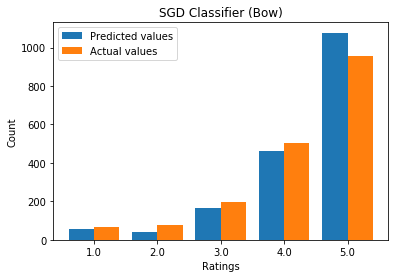

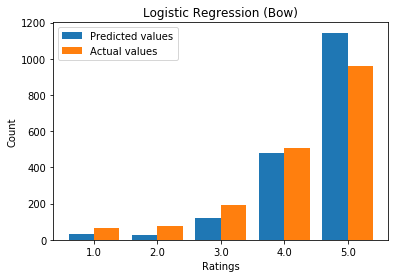

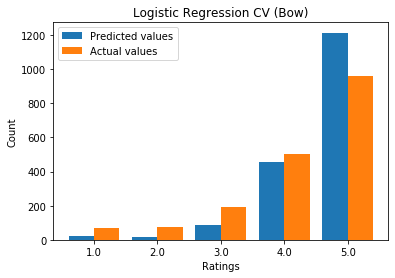

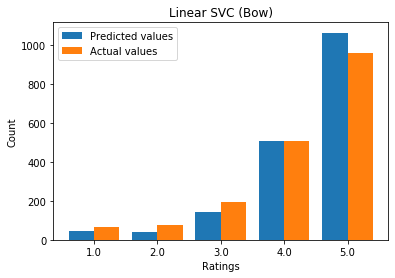

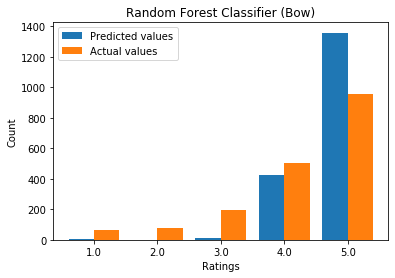

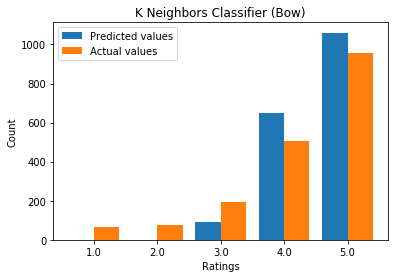

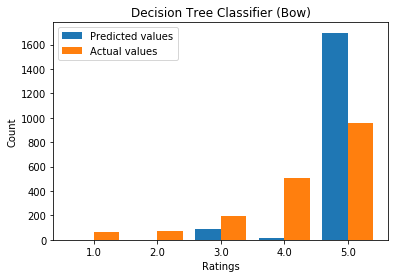

In [75]:
PlotBarG(dfr_bow,y,"Bow")

### Accuracy for Models

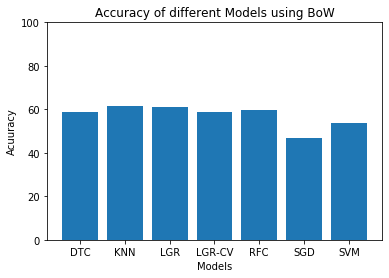

In [76]:
Acurracy(dfr_bow,y,"BoW")

### Histogram for Prediction value

In [77]:
#Histogram(dfr_bow,y,"Bag Of Word")

# TF-IDF

### Rating Prediction bar graph 

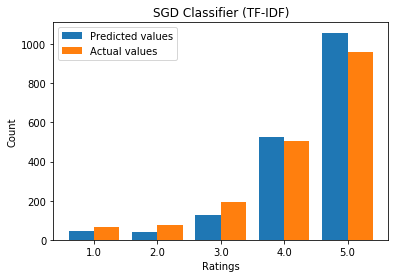

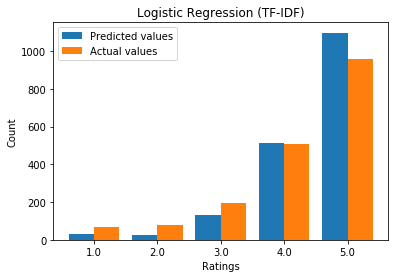

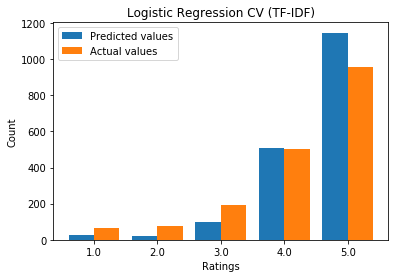

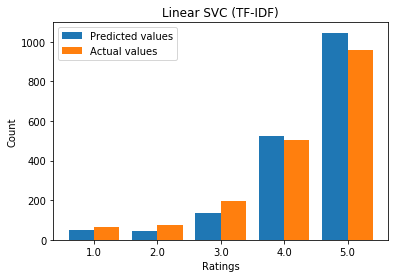

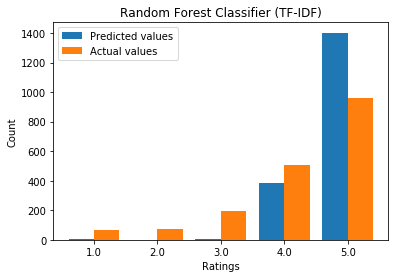

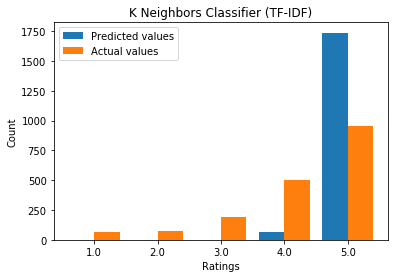

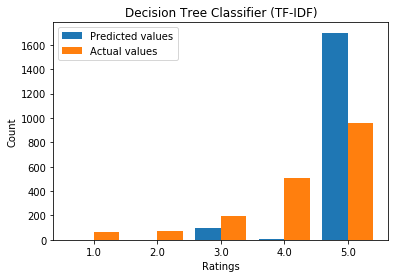

In [78]:
PlotBarG(pd.DataFrame(X.toarray()), y,"TF-IDF")

### Acurracy bar graph

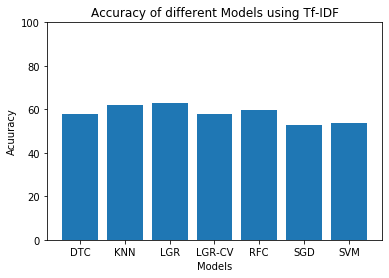

In [79]:
Acurracy(pd.DataFrame(X.toarray()), y,"Tf-IDF")

### Histogram for Rating Predictions for Different Graph

In [80]:
#Histogram(pd.DataFrame(X.toarray()), y,"Tf-IDF")

# Word2Vec

### Rating Prediction bar graph 

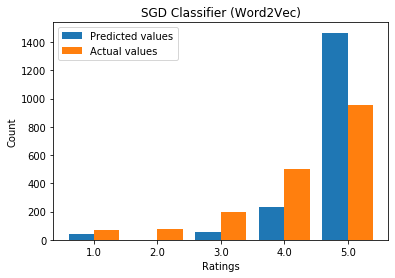

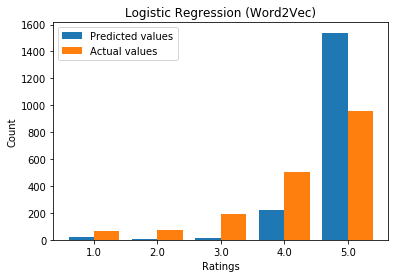

C:\Users\Win10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Win10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

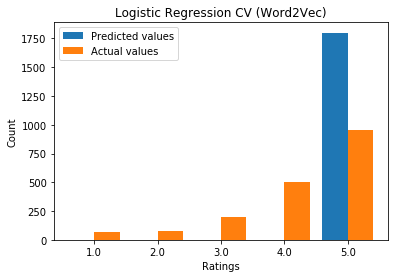

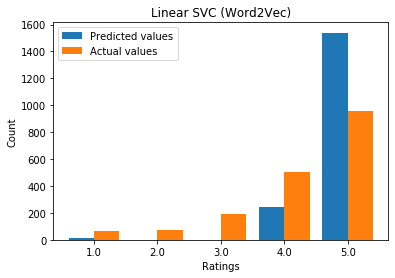

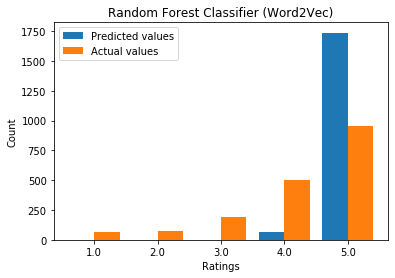

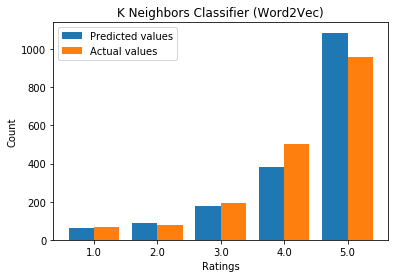

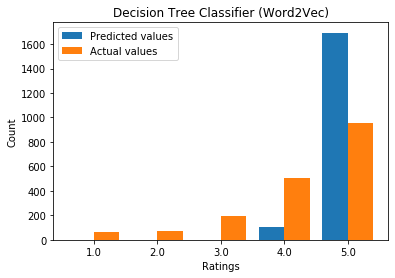

In [81]:
PlotBarG(pd.DataFrame(X_w), y,"Word2Vec")

### Acurracy bar graph

C:\Users\Win10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Win10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

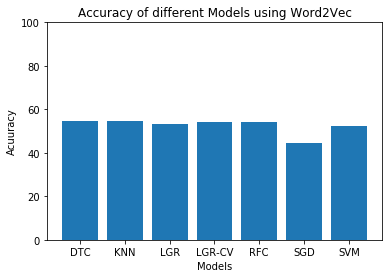

In [82]:
Acurracy(pd.DataFrame(X_w), y,"Word2Vec")

### Histogram for Rating Predictions for Different Graph

In [83]:
#Histogram(pd.DataFrame(X_w), y, "Word2Vec")

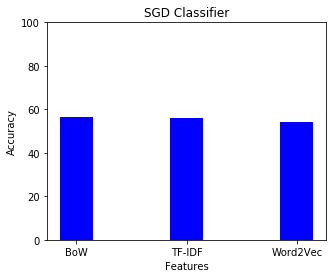

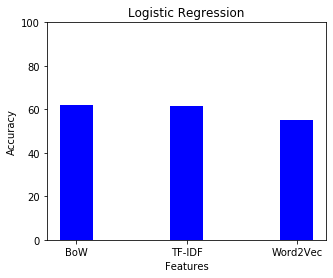

C:\Users\Win10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Win10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

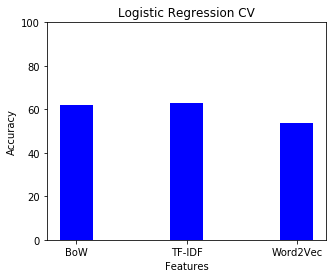

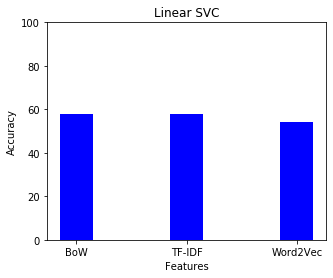

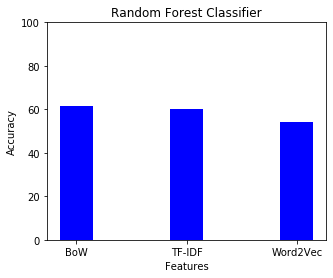

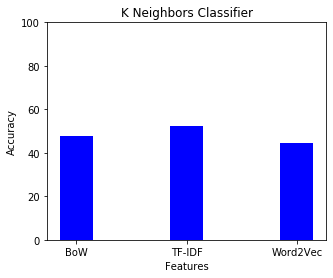

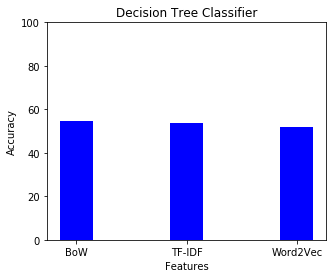

In [84]:
for key in clf.keys():
    l=[]
    scaler = MinMaxScaler(feature_range=(0, 1))
    g1 = scaler.fit_transform(dfr_bow)
    X_train, X_test, y_train, y_test = train_test_split(g1, y, test_size = 0.2, random_state = 42, stratify = y)
    clf[key].fit(X_train, y_train)
    y_pred = clf[key].predict(X_test)
    l.append(100*accuracy_score(y_test, y_pred))
    scaler = MinMaxScaler(feature_range=(0, 1))
    g1 = scaler.fit_transform(pd.DataFrame(X.toarray()))
    X_train, X_test, y_train, y_test = train_test_split(g1, y, test_size = 0.2, random_state = 42, stratify = y)
    clf[key].fit(X_train, y_train)
    y_pred = clf[key].predict(X_test)
    l.append(100*accuracy_score(y_test, y_pred))
    g1 = scaler.fit_transform(pd.DataFrame(X_w))
    X_train, X_test, y_train, y_test = train_test_split(g1, y, test_size = 0.2, random_state = 42, stratify = y)
    clf[key].fit(X_train, y_train)
    y_pred = clf[key].predict(X_test)
    l.append(100*accuracy_score(y_test, y_pred))
    fig = plt.figure(figsize = (5, 4))
    mod=['BoW','TF-IDF','Word2Vec']
    percentage=[10,20,30,40,50,60,70,80,90,100] 
    plt.bar(mod,l, color ='blue',width = 0.3)
    plt.ylim(0,100)
    plt.xlabel("Features")
    plt.ylabel("Accuracy")
    plt.title(Des[key])
    plt.show()

In [85]:
y.head()

2    5.0
3    5.0
4    5.0
5    4.0
6    4.0
Name: rating, dtype: object

In [86]:
y.unique()

array(['5.0', '4.0', '3.0', '1.0', '2.0'], dtype=object)

In [87]:
y.to_list()

['5.0',
 '5.0',
 '5.0',
 '4.0',
 '4.0',
 '3.0',
 '4.0',
 '5.0',
 '4.0',
 '4.0',
 '5.0',
 '5.0',
 '3.0',
 '5.0',
 '4.0',
 '4.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '4.0',
 '5.0',
 '5.0',
 '4.0',
 '5.0',
 '4.0',
 '5.0',
 '5.0',
 '5.0',
 '4.0',
 '5.0',
 '5.0',
 '4.0',
 '5.0',
 '5.0',
 '5.0',
 '3.0',
 '5.0',
 '4.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '3.0',
 '3.0',
 '5.0',
 '5.0',
 '4.0',
 '5.0',
 '4.0',
 '5.0',
 '4.0',
 '5.0',
 '3.0',
 '1.0',
 '4.0',
 '2.0',
 '3.0',
 '3.0',
 '3.0',
 '5.0',
 '4.0',
 '5.0',
 '4.0',
 '3.0',
 '3.0',
 '3.0',
 '2.0',
 '4.0',
 '4.0',
 '2.0',
 '4.0',
 '5.0',
 '4.0',
 '4.0',
 '4.0',
 '4.0',
 '4.0',
 '2.0',
 '4.0',
 '5.0',
 '4.0',
 '3.0',
 '4.0',
 '4.0',
 '5.0',
 '4.0',
 '5.0',
 '3.0',
 '2.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '4.0',
 '5.0',
 '4.0',
 '1.0',
 '4.0',
 '5.0',
 '4.0',
 '4.0',
 '3.0',
 '3.0',
 '4.0',
 '3.0',
 '4.0',
 '3.0',
 '3.0',
 '5.0',
 '4.0',
 '3.0',


In [88]:
data_distribution ={'1.0':0,'2.0':0,'3.0':0,'4.0':0,'5.0':0}
for attr in y.to_list():
    if attr in data_distribution.keys():
        data_distribution[attr] += 1
    else:
        data_distribution[attr] = 1
data_distribution
percentage=[]
    

    
rating=[]
count=[]
for c in data_distribution.keys():
    rating.append(c)
for c in data_distribution.values():
    count.append(c)   
total=y.count()

for c in count:
    percentage.append(100*c/total)
    
data={"Star":rating,
       "Number Of Reviews":count,
       "Percentage":percentage
     }
new = pd.DataFrame.from_dict(data)
new

,Star,Number Of Reviews,Percentage
0,1.0,223,3.716667
1,2.0,252,4.200000
2,3.0,647,10.783333
3,4.0,1684,28.066667
4,5.0,3194,53.233333


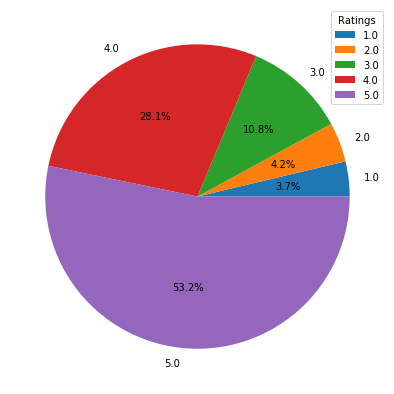

In [89]:
fig = plt.figure(figsize =(10, 7))
plt.pie(percentage, autopct='%1.1f%%',labels = rating)
plt.legend(title = "Ratings")
# show plot
plt.show()